PASOS QUE TENEMOS QUE SEGUIR PARA LLEVARLO A CABO ANALISIS EXPLORATORIO DATOS EDA:


- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.

_______________________________________________________

In [2]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
dataframe

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Conclusiones:

- Hay 48895 registros en el DataFrame.
- Price tiene un valor mínimo de 0 y un valor máximo de 10000. La media es de aprox 152.72 y la desviación estándar es de aprox 240.15. Hay una amplia variabilidad en los precios.



# Paso 2: Exploración y limpieza de datos

In [3]:
# Obtener las dimensiones
dataframe.shape

(48895, 16)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Conclusiones:

-  Tiene un total de 48895 filas y 16 columnas
-  Hay varias columnas con valores no nulos: name, host_name, last_review, y reviews_per_month.
-  Nos proporciona una visión general de los tipos de datos y los valores no nulos en el DataFrame. También sabemos que columnas que podrían requerir limpieza de valores faltantes.

In [5]:
#Eliminar duplicados
dataframe.drop("availability_365", axis = 1).duplicated().sum()

#print("no hay diplucados en las columnas.")

0

In [6]:
#Eliminar información irrelevante
dataframe.drop(["id", "host_id", "host_name", "last_review", "reviews_per_month", "name"], axis = 1, inplace = True)
dataframe.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


### Paso 3: Análisis de variables univariante

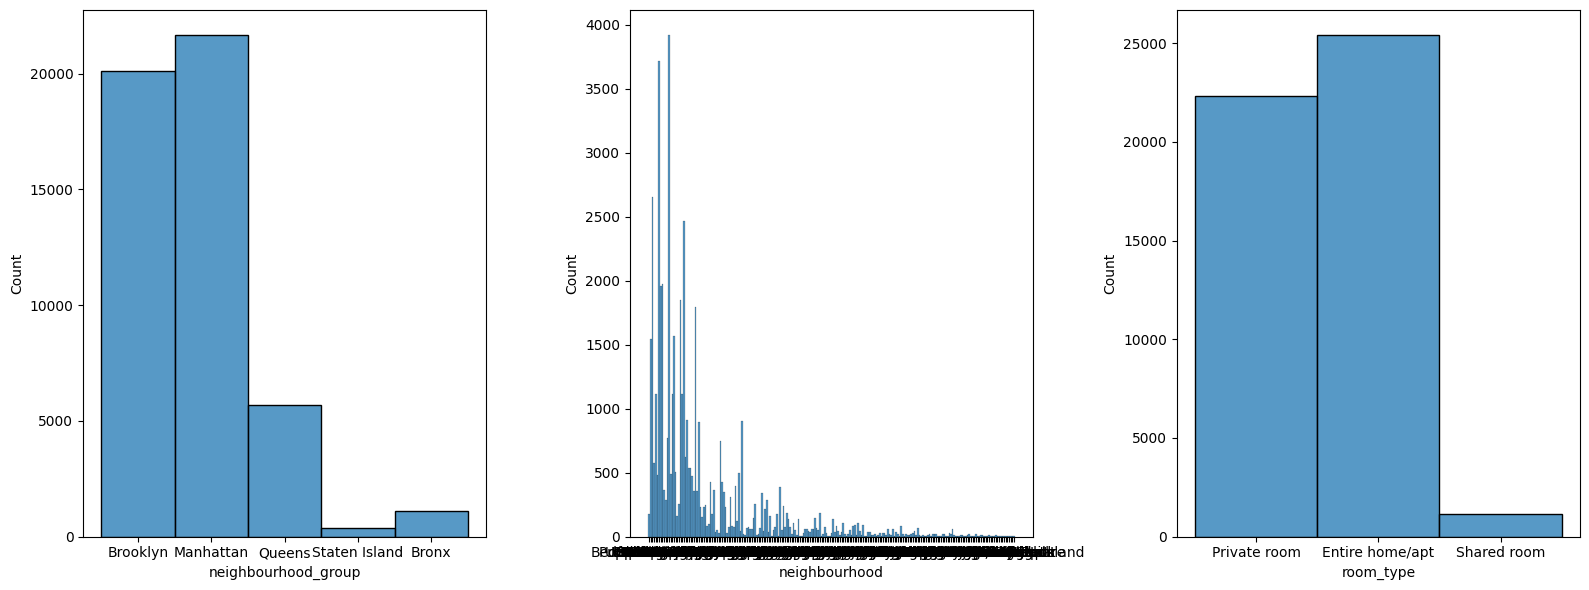

In [7]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Crear histogramas
sns.histplot(ax=axes[0], data=dataframe, x='neighbourhood_group')
sns.histplot(ax=axes[1], data=dataframe, x='neighbourhood')
sns.histplot(ax=axes[2], data=dataframe, x='room_type')

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Conclusiones

- Histograma de 'neighbourhood_group': Muesttra la distribución de los grupos de vecindarios. Cada barra en el gráfico correspondería a un grupo de vecindario y muestra la cantidad de propiedades en cada grupo. Nos una idea de la distribución geográfica de las propiedades en los diferentes grupos de vecindarios.
- Histograma de 'number_of_reviews': Muestra la distribución de la cantidad de opiniones para las propiedades y se muestra la frecuencia de las revisiones sin mostrar los valores exactos.
- Histograma de 'neighbourhood': Muestra el vecindario.


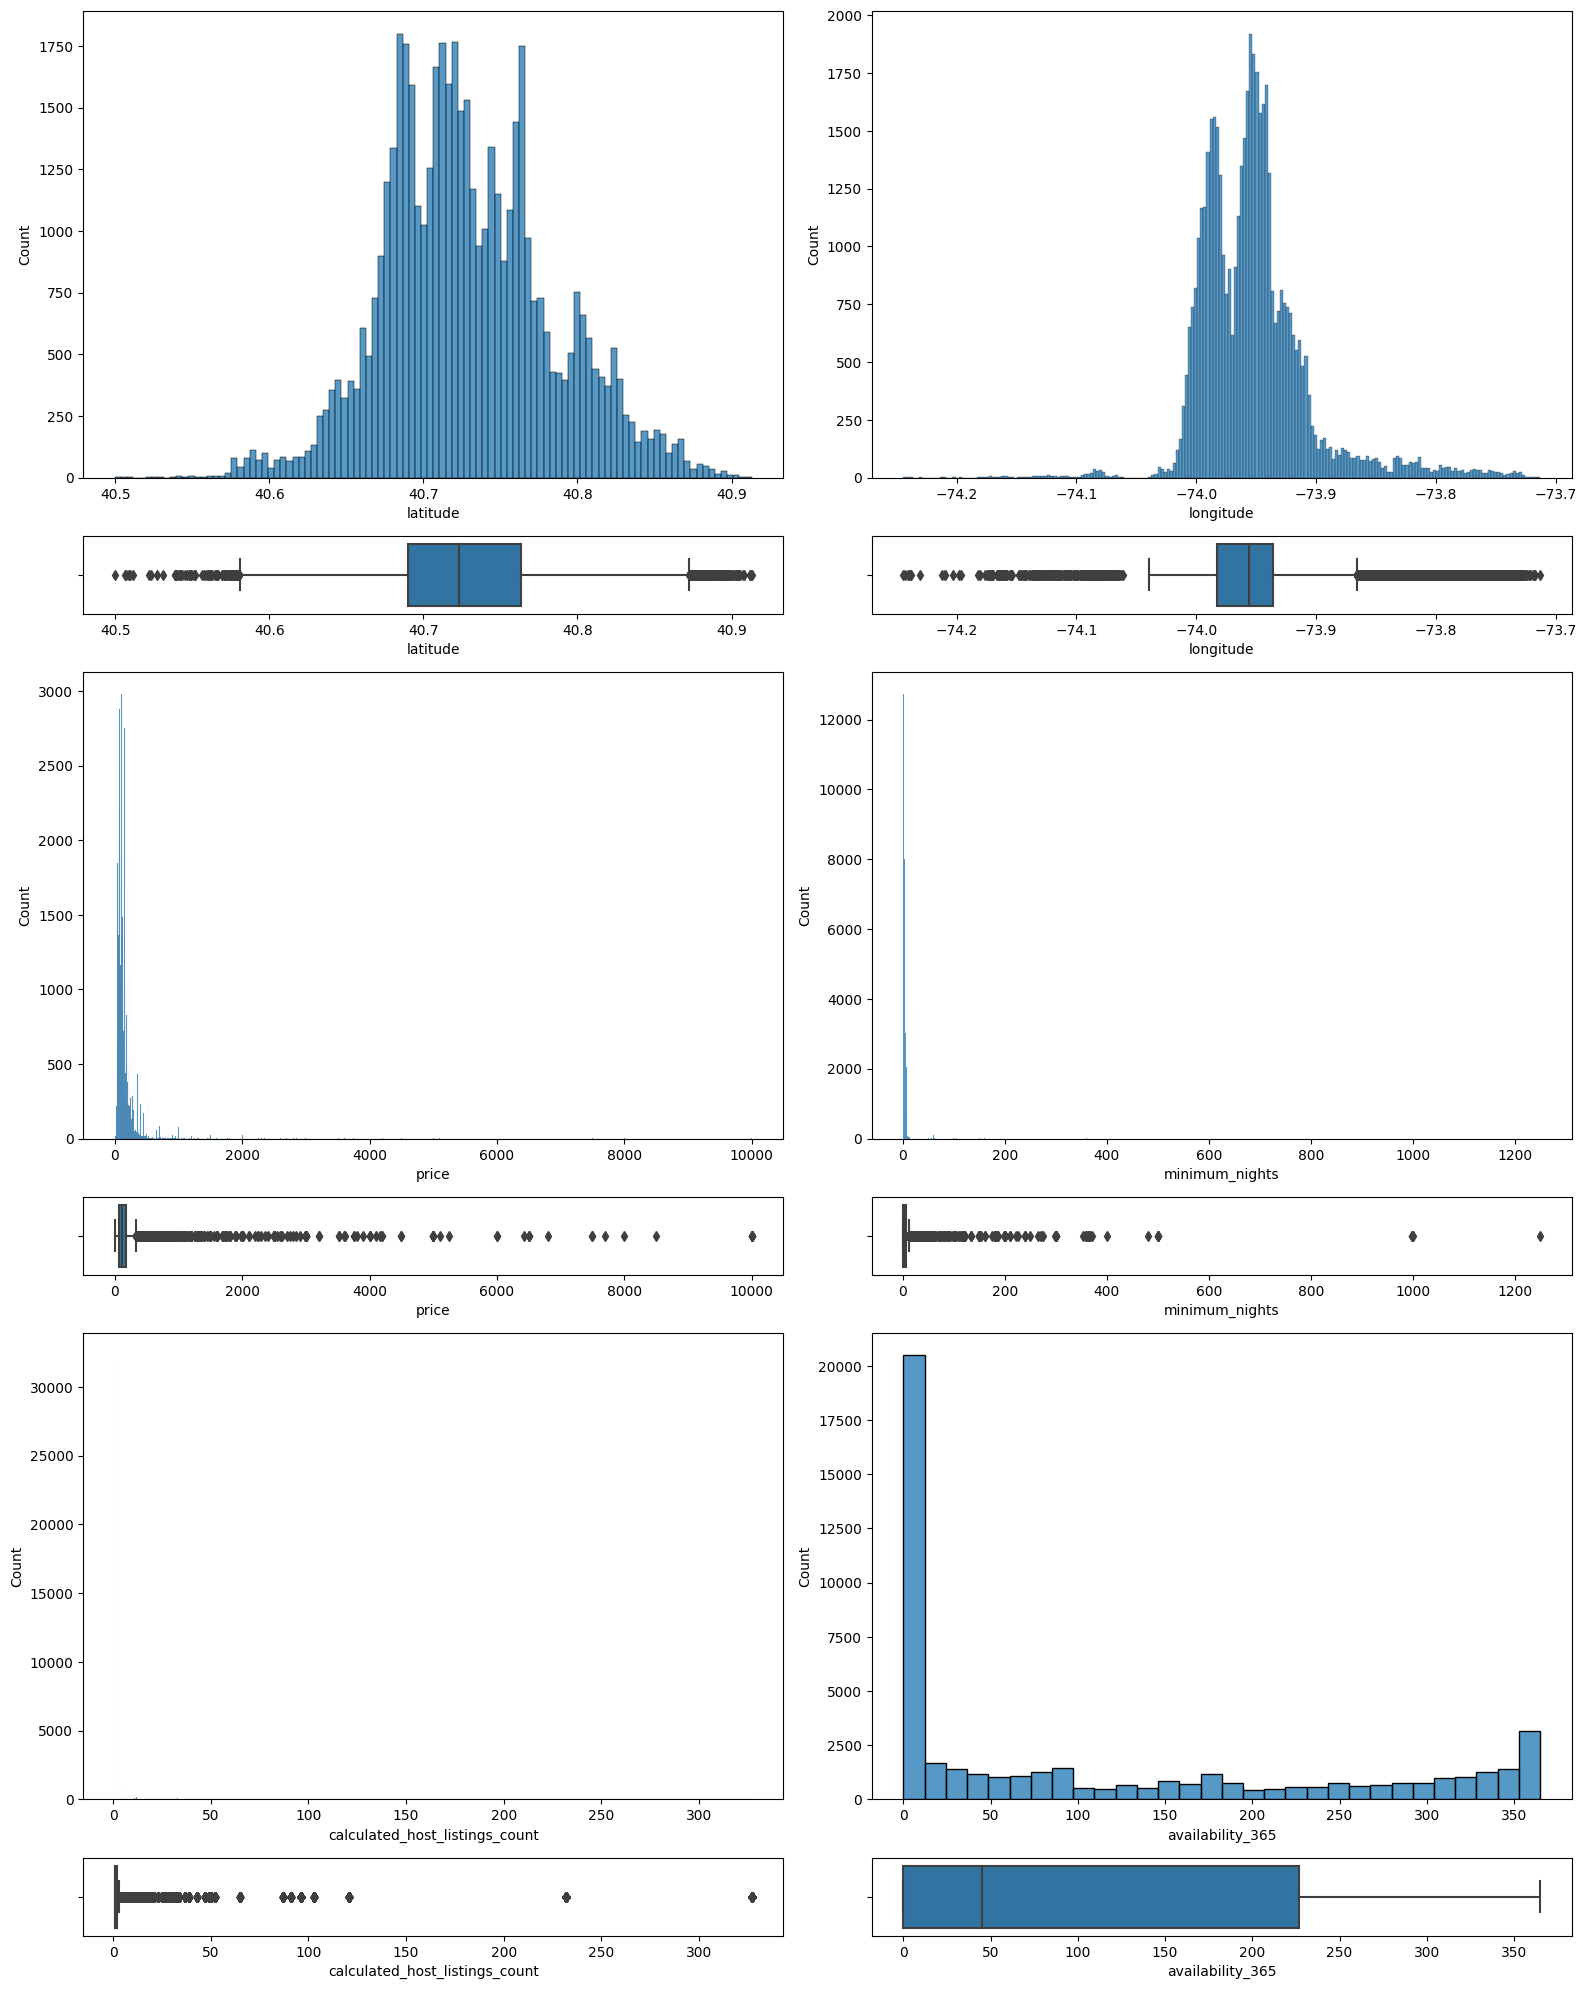

In [8]:
#Análisis sobre variables numéricas


import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 6 filas y 2 columnas
fig, axis = plt.subplots(6, 2, figsize=(16, 20), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="latitude")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="latitude")
sns.histplot(ax=axis[0, 1], data=dataframe, x="longitude")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="longitude")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="price")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="price")
sns.histplot(ax=axis[2, 1], data=dataframe, x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="minimum_nights")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="calculated_host_listings_count")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="calculated_host_listings_count")
sns.histplot(ax=axis[4, 1], data=dataframe, x="availability_365")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- Histograma y boxplot de 'latitude': El histograma muestra la distribución de las latitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente 40.728949, lo que indica que la mayoría de las propiedades se encuentran en el hemisferio norte. La desviación estándar es de aproximadamente 0.054530, lo que indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'longitude': El histograma muestra la distribución de las longitudes de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. La media es de aproximadamente -73.952170, lo que indica una ubicación general en el área de Nueva York. La desviación estándar es de aproximadamente 0.046157, lo que tambien indica cierta variabilidad en las ubicaciones geográficas.
- Histograma y boxplot de 'price': El histograma muestra la distribución de los precios de las propiedades, mientras que el boxplot nos da información sobre la mediana, los cuartiles y los valores atípicos. Hay una amplia variabilidad en los precios de las propiedades. El precio mínimo es de 0, mientras que el máximo es de 10,000. La media es de aproximadamente 152.72, lo que indica que hay una distribución sesgada hacia la derecha. La desviación estándar es de aproximadamente 240.15, lo que indica una gran dispersión de precios en el conjunto de datos.
- Histograma y boxplot de 'minimum_nights': El histograma mostraría la distribución de la cantidad mínima de noches requeridas para reservar una propiedad, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 7.03 y una desviación estándar de aproximadamente 20.51. Esto indica que, en promedio, se requieren alrededor de 7 noches como mínimo para reservar una propiedad. Tambien hay que tener en cuenta si estás interesado en alquileres a corto plazo o largo plazo, ya ue para uno son los  valores más bajos y para otro son los valores más altos.
- Histograma y boxplot de 'number_of_reviews': El histograma mostraría la distribución de la cantidad de revisiones para las propiedades, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 23.27 y una desviación estándar de aproximadamente 44.55. Las propiedades tienen alrededor de 23 revisiones de media. Tambien hay una gran variabilidad en la cantidad de revisiones, ya que la desviación estándar es relativamente alta. La cantidad de revisiones puede ser indicativa de la popularidad, la calidad o la satisfacción de los huéspedes con las propiedades.
- Histograma y boxplot de 'availability_365': El histograma mostraría la distribución de la disponibilidad de las propiedades a lo largo del año, mientras que el boxplot proporcionaría información sobre la mediana, los cuartiles y los valores atípicos. Tiene una media de aproximadamente 112.78 y una desviación estándar de aproximadamente 131.62. Las propiedades están disponibles para reserva alrededor de 112 días al año de media. La disponibilidad de las propiedades puede influir en la demanda, los precios y la planificación de la reserva

### Paso 4: Análisis de variables multivariante

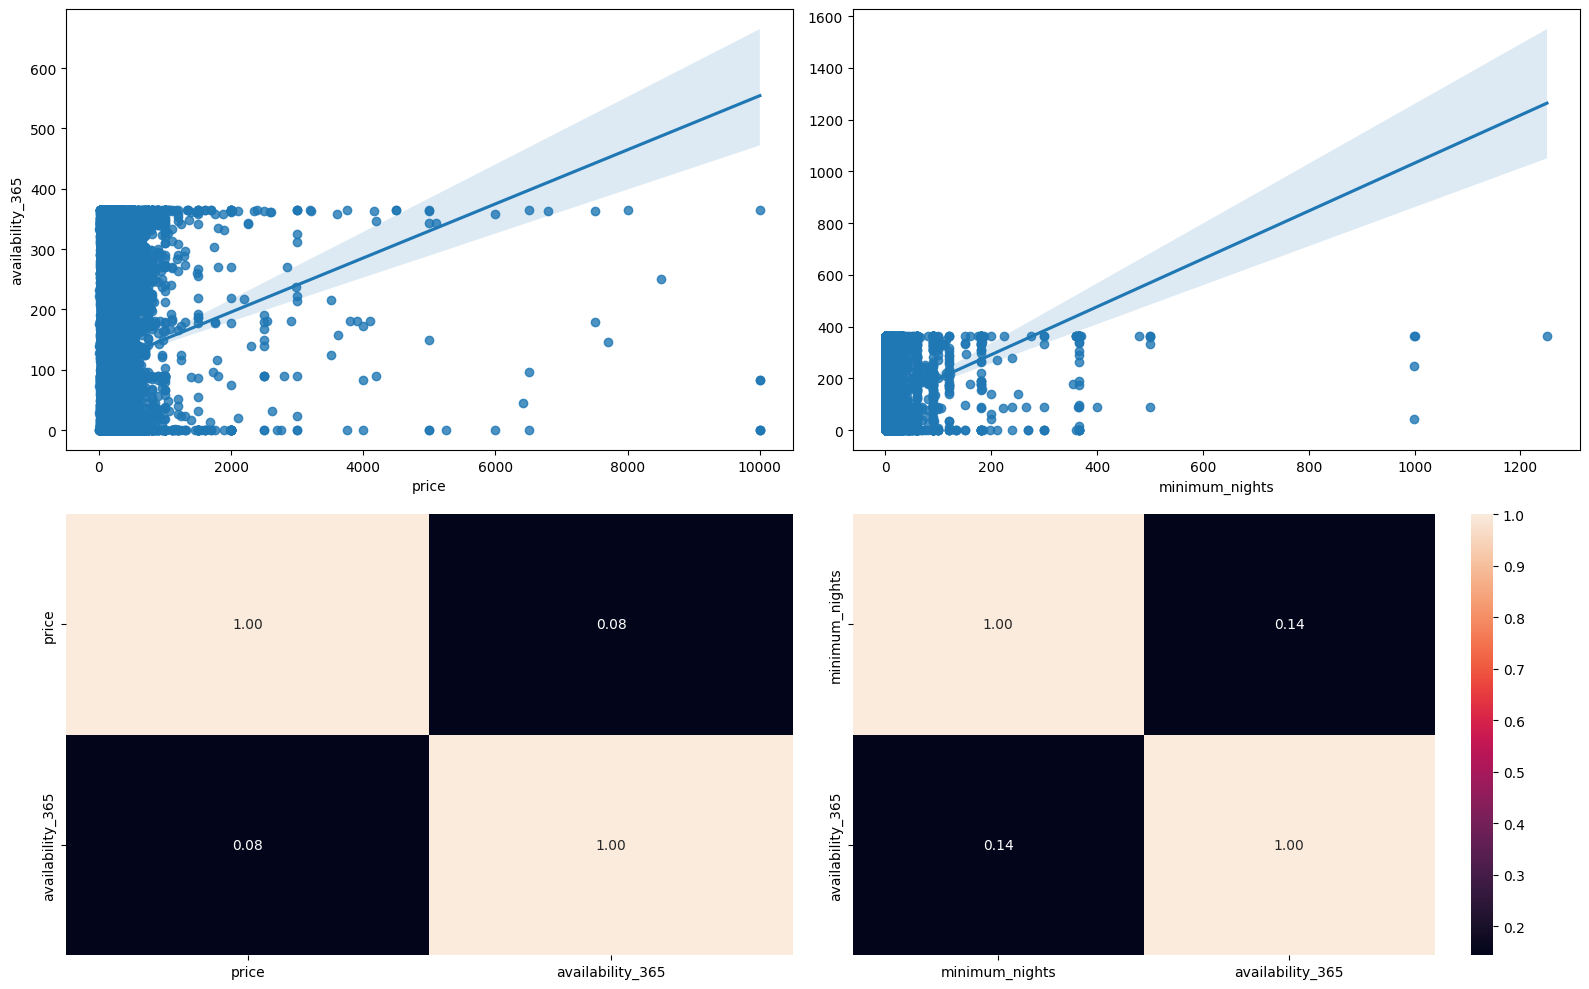

In [9]:
#Análisis numérico-numérico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de dispersión y correlación entre "age" y "duration"
sns.regplot(ax=axis[0, 0], data=dataframe, x="price", y="availability_365")
sns.heatmap(dataframe[["price", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "campaign" y "duration"
sns.regplot(ax=axis[0, 1], data=dataframe, x="minimum_nights", y="availability_365").set(ylabel=None)
sns.heatmap(dataframe[["minimum_nights", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Conclusiones

- Relación entre xxxxxxxxxxxxxxxxxx

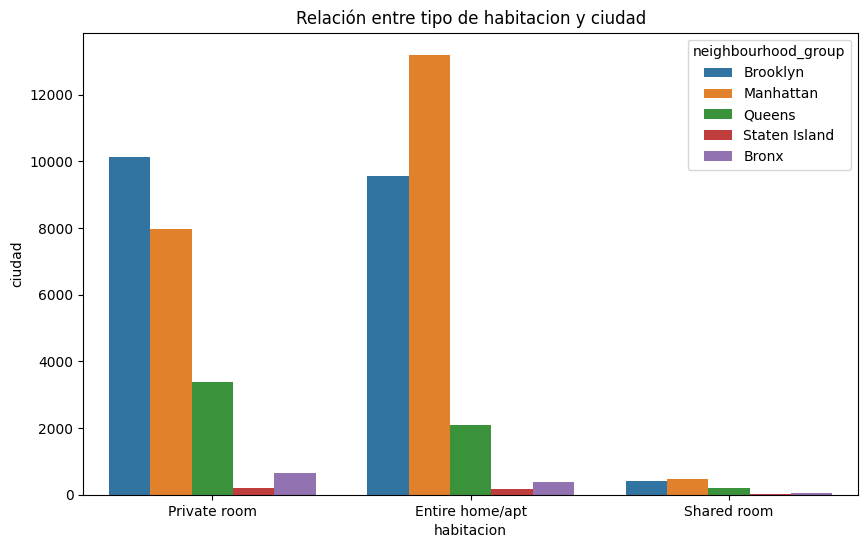

In [10]:
#Análisis categórico-categórico

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una tabla de contingencia entre las variables categóricas
contingency_table = pd.crosstab(dataframe['room_type'], dataframe['neighbourhood_group'])

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(data=dataframe, x='room_type', hue='neighbourhood_group')

# Establecer título y etiquetas de los ejes
plt.title("Relación entre tipo de habitacion y ciudad")
plt.xlabel("habitacion")
plt.ylabel("ciudad")

# Mostrar el gráfico
plt.show()

Conclusiones

- Relación entre xxxxxxxxxxxxxxxxxx

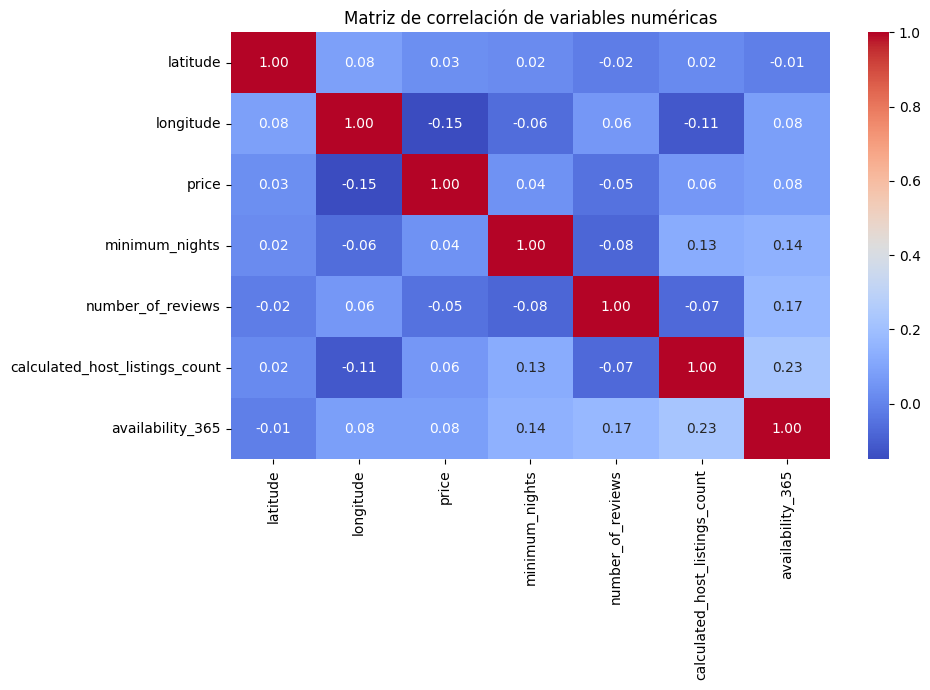

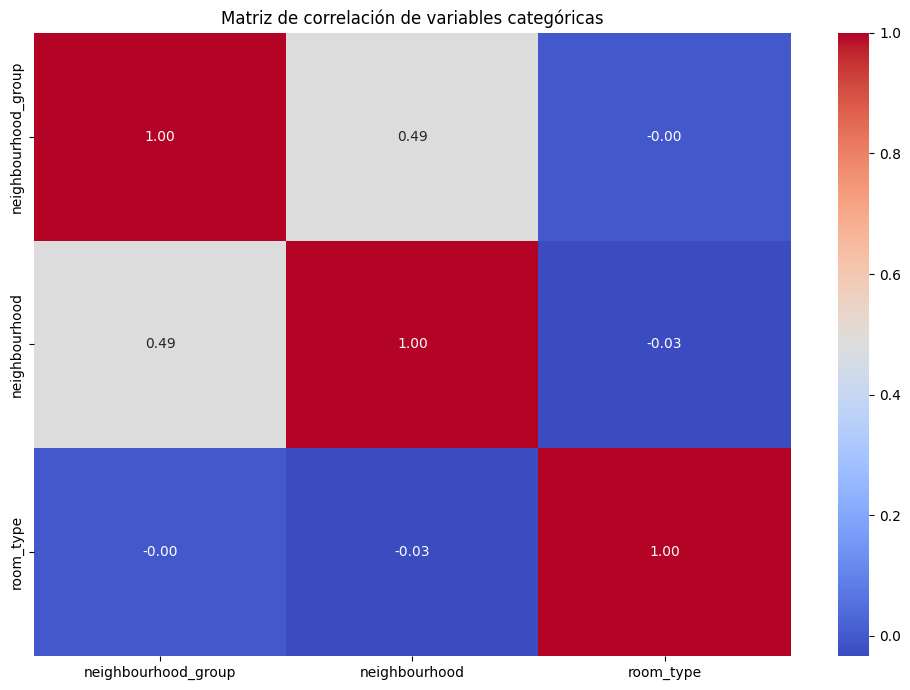

In [11]:
#Análisis numérico-categórico (completo y OPCIONAL)


import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]
categorical_columns = ["neighbourhood_group", "neighbourhood", "room_type"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Crear el mapa de calor de correlación para variables numéricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_numeric, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe[categorical_columns].apply(lambda x: pd.factorize(x)[0]).corr()

# Crear el mapa de calor de correlación para variables categóricas
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix_categorical, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables categóricas")
plt.tight_layout()
plt.show()



Conclusiones

- Existe una correlación positiva entre "price" y "availability_365". Esto sugiere que a medida que la disponibilidad de una propiedad aumenta, es más probable que el precio también tienda a ser más alto.
- No se observa una correlación clara entre el precio y las variables "latitude" o "longitude". Esto indica que la ubicación geográfica de una propiedad en sí misma no tiene una relación directa con el precio.
- No se observa una correlación clara entre el precio y las variables "number_of_reviews" o "reviews_per_month" y sugiere que la popularidad o las revisiones de los huéspedes no tienen una influencia significativa en el precio de una propiedad.
- No se observa una correlación clara entre el precio y la variable "minimum_nights". Esto indica que la duración mínima de la estancia no está directamente relacionada con el precio de una propiedad.

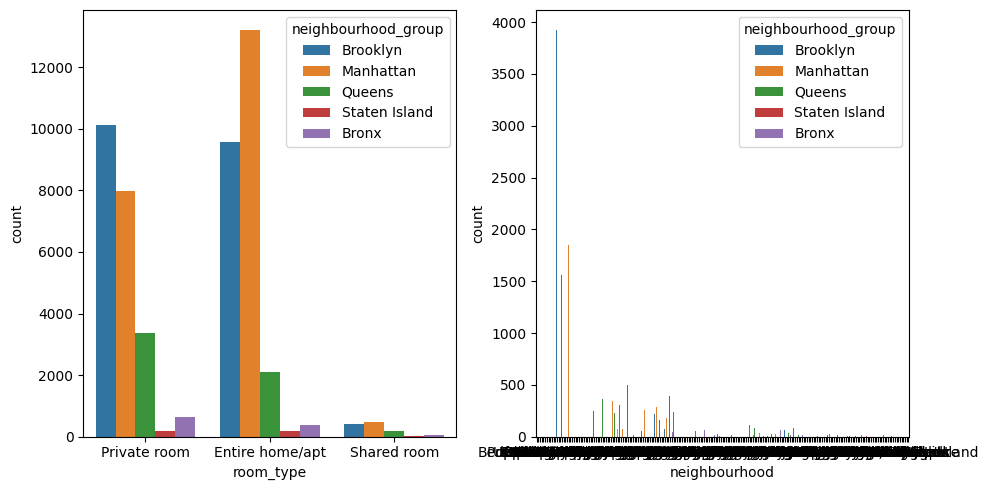

In [12]:
#Analizamos las variables vistas numericas

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

sns.countplot(ax=axis[0], data=dataframe, x="room_type", hue="neighbourhood_group")
sns.countplot(ax=axis[1], data=dataframe, x="neighbourhood", hue="neighbourhood_group")

plt.tight_layout()
plt.show()

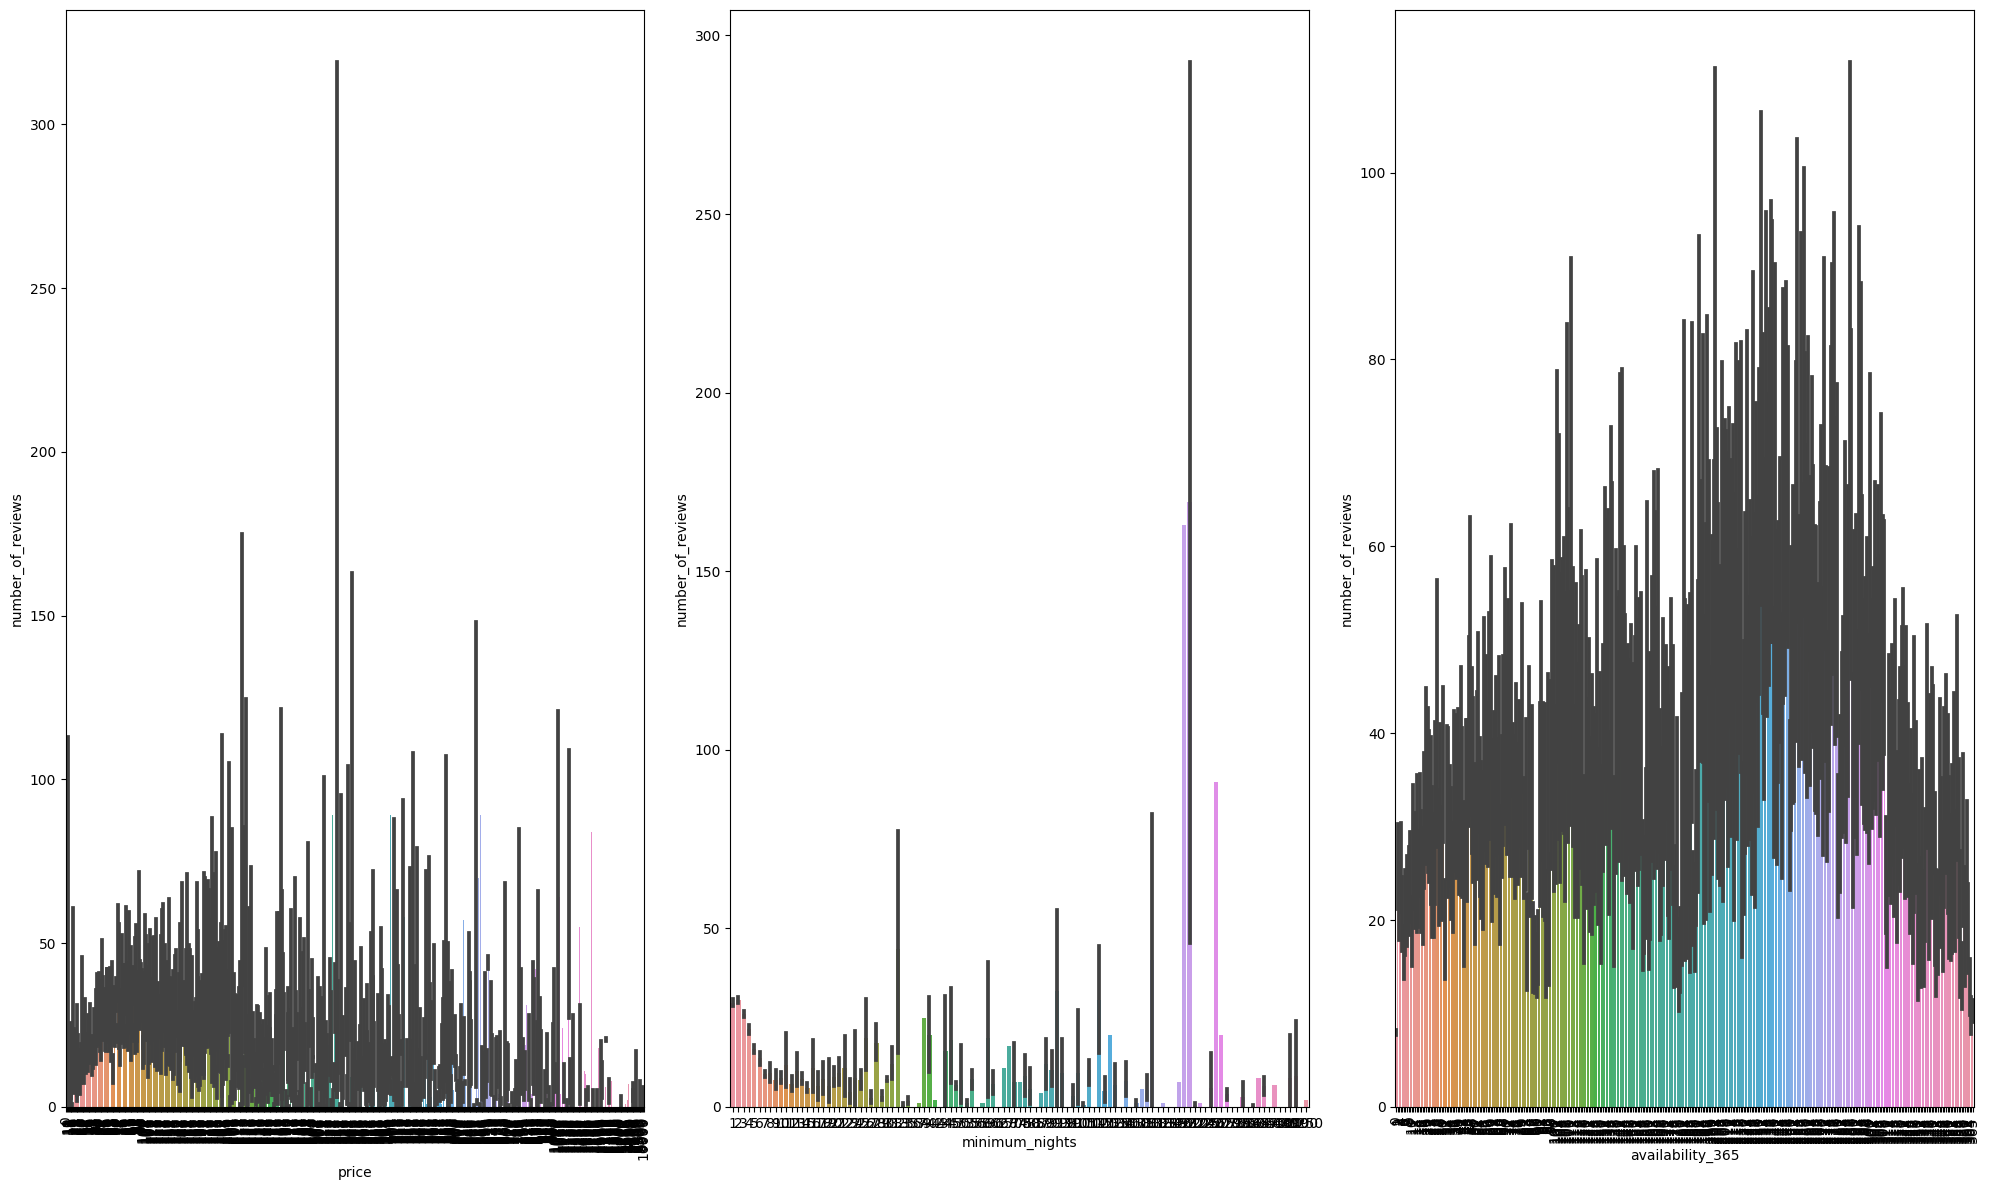

In [13]:
#Analizamos las variables vistas categoricas

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(20, 12), ncols=3)

sns.barplot(ax=axes[0], data=dataframe, x="price", y="number_of_reviews")
axes[0].set_xlabel("price")
axes[0].set_ylabel("number_of_reviews")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(ax=axes[1], data=dataframe, x="minimum_nights", y="number_of_reviews")
axes[1].set_xlabel("minimum_nights")
axes[1].set_ylabel("number_of_reviews")

sns.barplot(ax=axes[2], data=dataframe, x="availability_365", y="number_of_reviews")
axes[2].set_xlabel("availability_365")
axes[2].set_ylabel("number_of_reviews")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


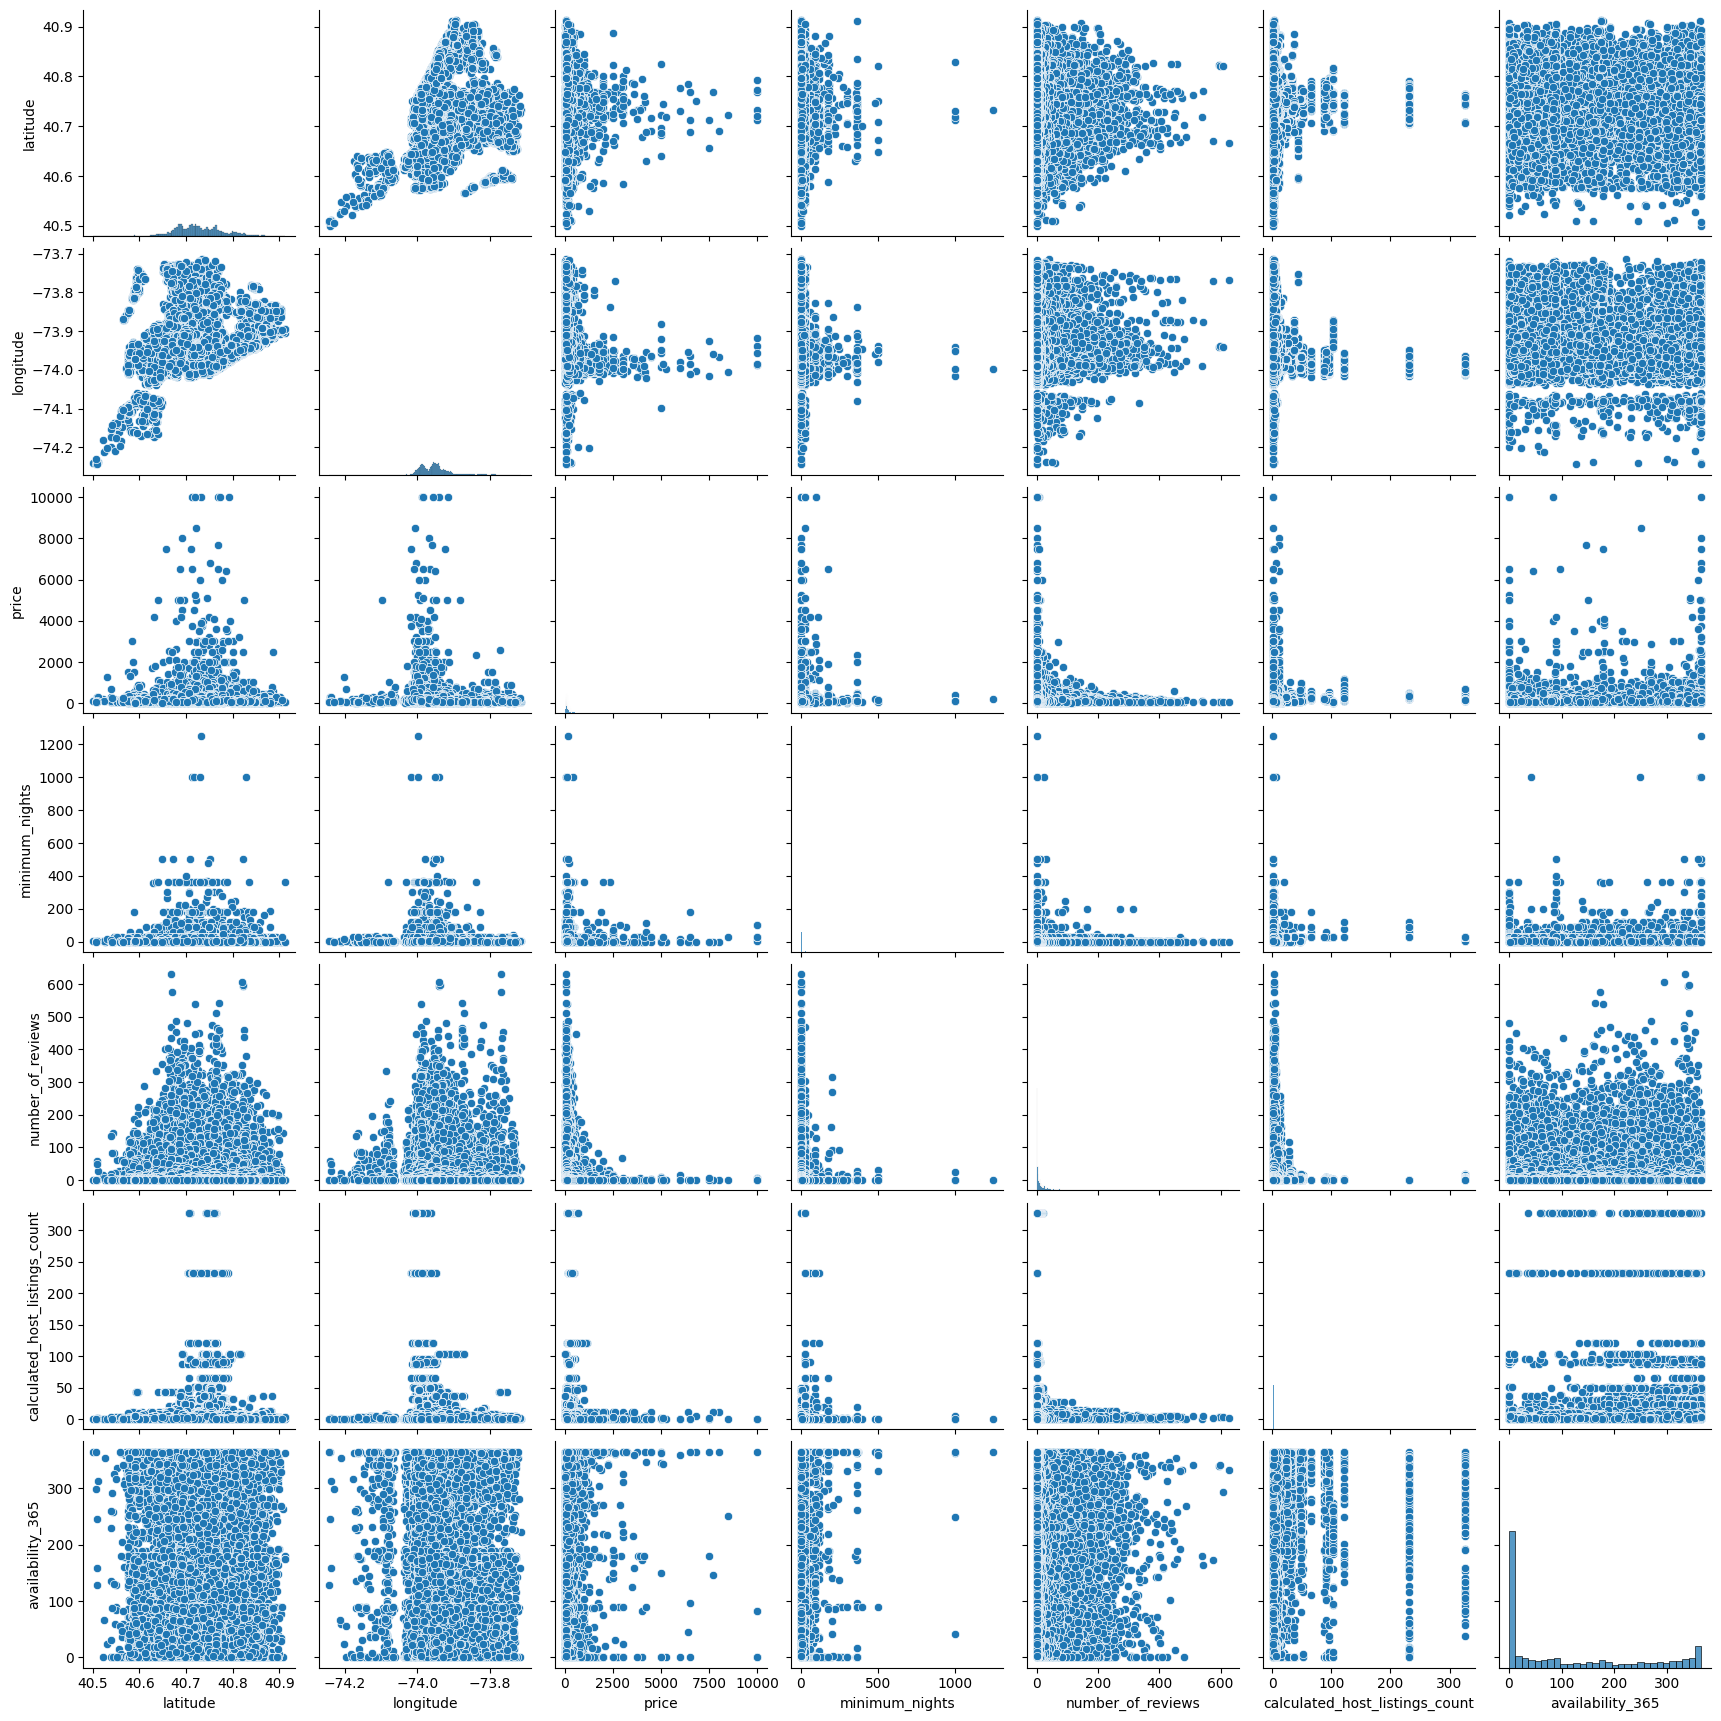

In [14]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

-Análisis de outliers

In [15]:
#análisis descriptivo para outliers

dataframe.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


Conclusiones

- latitude y Longitude: Muestran una variabilidad mínima, ya que los valores tienen una media cercana a 40.73 y -73.95. Esto sugiere que los datos se concentran en un área geográfica específica.
- price: El precio promedio de los alquileres es de aproximadamente 152.72 dólares, con una desviación estándar de 240.15 dólares. Se observa una amplia variabilidad en los precios, ya que el valor mínimo es 0 y el valor máximo es 10,000 dólares.
- minimum_nights: La estancia mínima promedio es de aproximadamente 7 días, con una desviación estándar de 20.51 días. Los valores oscilan entre 1 y 1250 días.
- number_of_reviews: El número promedio de reviews es de aproximadamente 23.27, con una desviación estándar de 44.55. Los valores varían entre 0 y 629 reviews.
- calculated_host_listings_count: En promedio, cada anfitrión tiene alrededor de 7 anuncios, con una desviación estándar de 32.95. El número de anuncios oscila entre 1 y 327.
- availability_365: La disponibilidad promedio es de aproximadamente 112.78 días, con una desviación estándar de 131.62 días. Los valores varían entre 0 y 365 días.

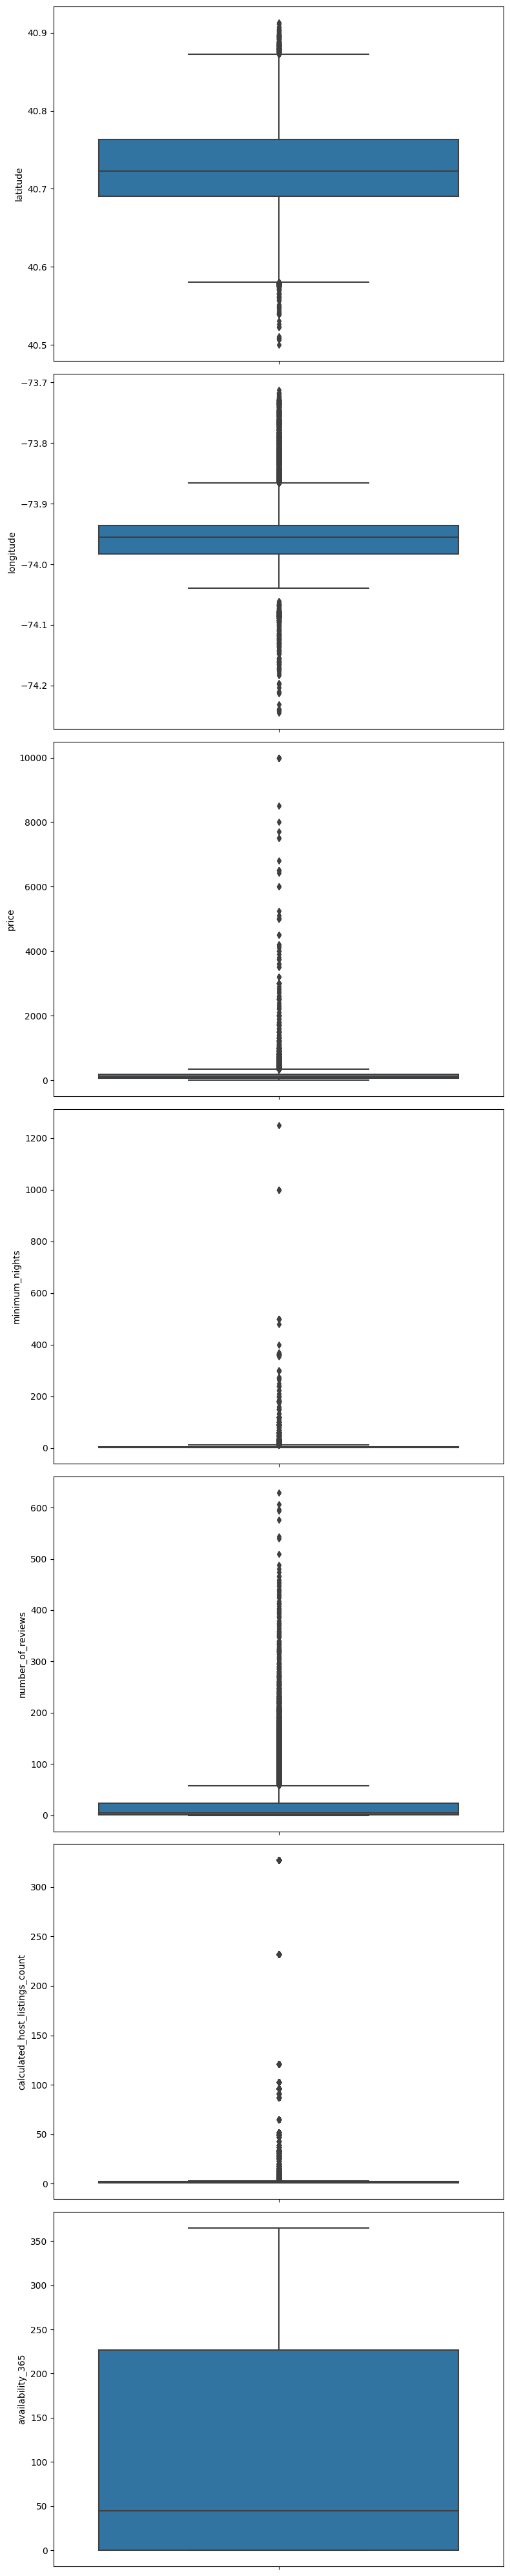

In [16]:
#Dibujar los diagramas de cajas de las variables

fig, axes = plt.subplots(7, 1, figsize=(8, 40))

sns.boxplot(ax=axes[0], data=dataframe, y="latitude")
sns.boxplot(ax=axes[1], data=dataframe, y="longitude")
sns.boxplot(ax=axes[2], data=dataframe, y="price")
sns.boxplot(ax=axes[3], data=dataframe, y="minimum_nights")
sns.boxplot(ax=axes[4], data=dataframe, y="number_of_reviews")
sns.boxplot(ax=axes[5], data=dataframe, y="calculated_host_listings_count")
sns.boxplot(ax=axes[6], data=dataframe, y="availability_365")

plt.tight_layout()
plt.show()

Conclusiones

- latitude y Longitude:  No se observan valores atípicos (outliers).
- price: presenta varios outliers en la parte superior, lo cual indica que hay algunos alquileres con precios muy altos en comparación con el resto.
- minimum_nights: Tambien presenta varios outliers en la parte superior lo que indica que hay algun piso que pide un minmo de noches muy alto.
- number_of_reviews: muestra varios valores atípicos en la parte superior, lo cual indica que hay algunos alquileres con un número muy alto de revisiones en comparación con el resto.
- calculated_host_listings_count: muestra varios valores atípicos.
- availability_365: No se observan outliers.

In [17]:
#eliminar outliers latitude

latitude_stats = dataframe["latitude"].describe()
print(latitude_stats)


fare_iqr = latitude_stats["75%"] - latitude_stats["25%"]
upper_limit = latitude_stats["75%"] + 1.5 * fare_iqr
lower_limit = latitude_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en latitude son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en latitude son 40.87 y 40.58, con un rango intercuartílico de 0.07


In [18]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["latitude"] > 40.86]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
26,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,1,0
28,Manhattan,Inwood,40.86482,-73.92106,Private room,44,3,108,3,311
261,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,13,365
265,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,2,323
302,Manhattan,Inwood,40.86713,-73.92811,Private room,90,2,120,1,132
...,...,...,...,...,...,...,...,...,...,...
48415,Bronx,Fordham,40.86265,-73.89263,Entire home/apt,178,2,0,8,89
48416,Bronx,Fordham,40.86264,-73.89139,Private room,29,2,0,8,81
48417,Bronx,Fordham,40.86263,-73.89088,Private room,33,2,0,8,84
48515,Manhattan,Inwood,40.86830,-73.92161,Entire home/apt,349,2,0,1,365


In [19]:
#eliminar outliers longitude

longitude_stats = dataframe["longitude"].describe()
print(longitude_stats)


fare_iqr = longitude_stats["75%"] - longitude_stats["25%"]
upper_limit = longitude_stats["75%"] + 1.5 * fare_iqr
lower_limit = longitude_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en longitude son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en longitude son -73.87 y -74.05, con un rango intercuartílico de 0.05


In [20]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["longitude"] > -73.86]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
143,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,1,1
196,Queens,Jamaica,40.67252,-73.76597,Private room,55,2,52,2,365
260,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,7,349
261,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,13,365
360,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,1,88
...,...,...,...,...,...,...,...,...,...,...
48813,Queens,Bayswater,40.61113,-73.76546,Entire home/apt,80,2,0,1,87
48819,Queens,Cambria Heights,40.69000,-73.73098,Private room,50,1,0,1,175
48858,Queens,Flushing,40.74387,-73.82556,Private room,68,3,0,4,362
48866,Queens,Briarwood,40.70786,-73.81448,Entire home/apt,58,1,0,1,159


In [21]:
#eliminar outliers price

price_stats = dataframe["price"].describe()
print(price_stats)


fare_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * fare_iqr
lower_limit = price_stats["25%"] - 1.5 * fare_iqr

print(f"\n- Los límites superior e inferior para la búsqueda de outliers en price son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

- Los límites superior e inferior para la búsqueda de outliers en price son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [22]:
#veamos cuántos valores representan ese valor extremo de X
dataframe[dataframe["price"] > 334]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
61,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,1,180
85,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,1,7
103,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2,243
114,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,4,298
121,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2,216
...,...,...,...,...,...,...,...,...,...,...
48758,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,1,364
48833,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,1,64
48839,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,1,23
48842,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,1,9


ACABAR VARIABLEEEEESSS ACABAR VARIABLEEEEESSS ACABAR VARIABLEEEEESSS ACABAR VARIABLEEEEESSS ACABAR VARIABLEEEEESSS

In [23]:
#Análisis de valores faltantes

dataframe.isnull().sum()


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [24]:
dataframe.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [25]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_variables = ["price", "number_of_reviews", "availability_365"]


norm_features = scaler.fit_transform(dataframe[num_variables])

dataframe_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
dataframe_norm.head()


,price,number_of_reviews,availability_365
0,-0.015493,-0.320414,1.916250
1,0.300974,0.487665,1.840275
2,-0.011329,-0.522433,1.916250
3,-0.265335,5.538156,0.617065
4,-0.302811,-0.320414,-0.856865


Conclusiones

- latitude y Longitude: ahora están en una escala estándar, donde los valores negativos indican ubicaciones por debajo de la media y los valores positivos indican ubicaciones por encima de la media.
- Price, Minimum Nights, Number of Reviews y Availability 365: Estas variables han sido escaladas según la desviación estándar de sus respectivos conjuntos de datos. Los valores más negativos indican valores por debajo de la media y los valores más positivos indican valores por encima de la media.

La normalización nos puede facilitar la comparación y el análisis de las variables. Hay importante tener en cuenta que la normalización no altera la forma o la distribución de los datos, solo cambia su escala.

In [26]:
#Escalado Mínimo-Máximo

from sklearn.preprocessing import MinMaxScaler

num_variables = ["price", "number_of_reviews", "availability_365"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()

,price,number_of_reviews,availability_365
0,0.0149,0.014308,1.000000
1,0.0225,0.071542,0.972603
2,0.0150,0.000000,1.000000
3,0.0089,0.429253,0.531507
4,0.0080,0.014308,0.000000


Conclusiones

- latitude y Longitude: ahora están en el rango entre 0 y 1, donde 0 representa el valor mínimo y 1 representa el valor máximo.
- Price, Minimum Nights, Number of Reviews y Availability 365: igual que latitude y longitude.

El escalado mínimo-máximo es útil para poner las variables en una escala común y limitada, lo que facilita la comparación y el análisis de las variables.

In [33]:
#selección de características (feature selection). seleccionar las características (variables) más relevantes
#de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning

import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = dataframe_scal.drop("price", axis=1)
y = dataframe_scal["price"]

# Convertir las etiquetas continuas en etiquetas discretas
y_discrete = pd.cut(y, bins=3, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)
selection_model = SelectKBest(chi2, k=2)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Ajustar el LabelEncoder en las etiquetas discretas
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Convertir las etiquetas discretas de vuelta a continuas
y_train_continuous = label_encoder.inverse_transform(y_train)
y_test_continuous = label_encoder.inverse_transform(y_test)

X_train_sel["price"] = y_train_continuous
X_test_sel["price"] = y_test_continuous

train_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\013-PROYECTO1-machine-learning-python-template-main\src\clean_train.csv"
test_file_path = r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\013-PROYECTO1-machine-learning-python-template-main\src\test_train.csv"

X_train_sel.to_csv(train_file_path, index=False)
X_test_sel.to_csv(test_file_path, index=False)

YA ESTAMOS PREPARADOS PARA ENTRENAR EL MODELO!! :D